# Projet Arbres de décision et Méthodes d'agrégations
-- Par Isaline Hervé - M2 ECAP --

# Importation des packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import re

# Importation des données et premiers traitements
## Importation des données

In [2]:
df = pd.read_csv('./data/train.csv', header=0)
df.info()
# 7094 lignes, 25 colonnes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   nom_du_projet                        7094 non-null   object 
 1   resume_du_projet                     6917 non-null   object 
 2   montant_engage                       7094 non-null   float64
 3   numero_ej                            6025 non-null   float64
 4   numero_operateur                     1072 non-null   object 
 5   opérateur                            1072 non-null   object 
 6   demarche                             6962 non-null   object 
 7   nom_region                           6929 non-null   object 
 8   nom_departement                      6929 non-null   object 
 9   code_departement                     6929 non-null   object 
 10  siret_beneficiaire                   6930 non-null   float64
 11  raison_sociale_beneficiaire   

In [3]:
df.head()

,nom_du_projet,resume_du_projet,montant_engage,numero_ej,numero_operateur,opérateur,demarche,nom_region,nom_departement,code_departement,...,siret,activitePrincipale,codePostal,dateCreation,categorieEntreprise,trancheEffectifsUniteLegale,societeMissionUniteLegale,etatAdministratifEtablissement,anneeEffectifsEtablissement,economieSocialeSolidaireUniteLegale
0,"Changement des fenêtres ,des portes et pose de...","Suite aux différents audits, il convient de fi...",20710.00,2.104489e+09,NaN,NaN,Rénovation énergétique des bâtiments publics l...,Normandie,Eure,27,...,2.000561e+13,84.11Z,27160.0,2016-01-01,PME,12,NaN,A,2023.0,N
1,ZAC Bernard Duval,La ZAC Claude Bernard / Alexandre Duval à Renn...,200000.00,2.104469e+09,NaN,NaN,Recyclage foncier,Bretagne,Ille-et-Vilaine,35,...,5.231896e+13,42.99Z,35200.0,2010-05-10,ETI,03,NaN,A,2023.0,N
2,Travaux d'urgence de confortement et d'aménage...,Suites aux intempéries du début du mois de déc...,14157.02,2.104386e+09,NaN,NaN,Appui aux collectivités de montagne soumises à...,Provence-Alpes-Côte d'Azur,Hautes-Alpes,05,...,2.000673e+13,84.11Z,5230.0,2017-01-01,PME,12,NaN,A,2023.0,N
3,Rénovation thermique de l'école de GERBEPAL - ...,La commune de GERBÉPAL souhaite rénover le bât...,202019.00,2.104371e+09,NaN,NaN,Rénovation énergétique des bâtiments publics l...,Grand Est,Vosges,88,...,2.188020e+13,84.11Z,88430.0,1999-12-25,PME,11,NaN,A,2023.0,N
4,Rénovation énergétique du Centre Omnisport de ...,Situé à proximité du quartier de Marbé au nord...,587251.00,2.104409e+09,NaN,NaN,Rénovation énergétique des bâtiments publics l...,Bourgogne-Franche-Comté,Saône-et-Loire,71,...,2.171027e+13,84.11Z,71000.0,1983-03-01,ETI,42,NaN,A,2023.0,N


## Pré traitements

In [4]:
# Modification des noms de colonnes
# Harmonisation, suppression des accents et des espaces
df = df.rename(columns={
    "opérateur": "operateur",
    "forme juridique_beneficiaire": "forme_juridique_beneficiaire",
    "activitePrincipale": "activite_principale",
    "codePostal": "code_postal",
    "dateCreation": "date_creation",
    "categorieEntreprise": "categorie_entreprise",
    "trancheEffectifsUniteLegale": "tranche_effectifs_unite_legale",
    "societeMissionUniteLegale": "societe_mission_unite_legale",
    "etatAdministratifEtablissement": "etat_administratif_etablissement",
    "anneeEffectifsEtablissement": "annee_effectifs_etablissement",
    "economieSocialeSolidaireUniteLegale": "economie_sociale_solidaire_unite_legale"
})

# Vérification 
df.head()

,nom_du_projet,resume_du_projet,montant_engage,numero_ej,numero_operateur,operateur,demarche,nom_region,nom_departement,code_departement,...,siret,activite_principale,code_postal,date_creation,categorie_entreprise,tranche_effectifs_unite_legale,societe_mission_unite_legale,etat_administratif_etablissement,annee_effectifs_etablissement,economie_sociale_solidaire_unite_legale
0,"Changement des fenêtres ,des portes et pose de...","Suite aux différents audits, il convient de fi...",20710.00,2.104489e+09,NaN,NaN,Rénovation énergétique des bâtiments publics l...,Normandie,Eure,27,...,2.000561e+13,84.11Z,27160.0,2016-01-01,PME,12,NaN,A,2023.0,N
1,ZAC Bernard Duval,La ZAC Claude Bernard / Alexandre Duval à Renn...,200000.00,2.104469e+09,NaN,NaN,Recyclage foncier,Bretagne,Ille-et-Vilaine,35,...,5.231896e+13,42.99Z,35200.0,2010-05-10,ETI,03,NaN,A,2023.0,N
2,Travaux d'urgence de confortement et d'aménage...,Suites aux intempéries du début du mois de déc...,14157.02,2.104386e+09,NaN,NaN,Appui aux collectivités de montagne soumises à...,Provence-Alpes-Côte d'Azur,Hautes-Alpes,05,...,2.000673e+13,84.11Z,5230.0,2017-01-01,PME,12,NaN,A,2023.0,N
3,Rénovation thermique de l'école de GERBEPAL - ...,La commune de GERBÉPAL souhaite rénover le bât...,202019.00,2.104371e+09,NaN,NaN,Rénovation énergétique des bâtiments publics l...,Grand Est,Vosges,88,...,2.188020e+13,84.11Z,88430.0,1999-12-25,PME,11,NaN,A,2023.0,N
4,Rénovation énergétique du Centre Omnisport de ...,Situé à proximité du quartier de Marbé au nord...,587251.00,2.104409e+09,NaN,NaN,Rénovation énergétique des bâtiments publics l...,Bourgogne-Franche-Comté,Saône-et-Loire,71,...,2.171027e+13,84.11Z,71000.0,1983-03-01,ETI,42,NaN,A,2023.0,N


## Vérification et traitement des doublons

In [5]:
# Vérification des doublons 
dupes = df.duplicated().sum()
print(f"Number of duplicate rows: {dupes}")
# Pas de doublons détectés

Number of duplicate rows: 0


## Vérification et traitement des valeurs manquantes

In [6]:
# Vérification des valeurs manquantes
print(f"Number of missing values per column:\n{df.isnull().sum().sort_values(ascending=False)}")
# Beaucoup de valeurs manquantes, notamment dans societe_mission_unite_legale, operateur et numero_operateur
# Pas de valeurs manquantes dans nom_du_projet et montant_engage

Number of missing values per column:
societe_mission_unite_legale               7082
operateur                                  6022
numero_operateur                           6022
economie_sociale_solidaire_unite_legale    1966
numero_ej                                  1069
annee_effectifs_etablissement               394
etat_administratif_etablissement            237
categorie_entreprise                        218
resume_du_projet                            177
code_postal                                 168
tranche_effectifs_unite_legale              165
date_creation                               165
nom_region                                  165
nom_departement                             165
siret                                       165
code_departement                            165
activite_principale                         165
siret_beneficiaire                          164
raison_sociale_beneficiaire                 138
forme_juridique_beneficiaire                138
dem

In [7]:
# Visualisation des valeurs manquantes en pourcentage
na = df.isna().sum()/df.shape[0]*100 # pourcentage de valeurs manquantes par variable
palettehex = sns.color_palette("Paired").as_hex()
px.bar(na.sort_values(),
         title = "Pourcentage de valeurs manquantes par variable",
         color_discrete_sequence = palettehex[0:1],
         template='ggplot2',
         range_y = [0,100],
         width=800,
         labels={'value':'%', 'index':''},
         color=None
        ).update_traces(showlegend=False).update_xaxes(tickangle=45)
# societe_mission_unite_legale, numero_operateur et operateur ont plus de 70% de valeurs manquantes

In [8]:
# Traitement des valeurs manquantes
NON_RENSEIGNE = "Non_renseigne"

# Colonnes où toute valeur manquante entraîne la suppression de la ligne (car pas de sens à imputer)
DROP_ROW_IF_NA = [
    # Identifiants
    "nom_du_projet",
    "numero_ej",
    "numero_operateur",
    "operateur",
    # Catégories d'entreprise
    "categorie_entreprise",
    "categorie_juridique_unite_legale",
    "tranche_effectifs_unite_legale",
    # Temporel
    "date_creation",
    # Activité
    "activite_principale",
    # Administratif
    "etat_administratif_etablissement",
    "annee_effectifs_etablissement",
    "raison_sociale_beneficiaire",
    "forme_juridique_beneficiaire",
    # Autres
    "resume_du_projet"
]

# Colonnes où les valeurs manquantes doivent être remplacées
REPLACE_NA_COLS = [
    # Géographie à l'échelle communale
    "code_commune",
    "nom_commune",
    # Binaires institutionnelles
    "societe_mission_unite_legale",
    "economie_sociale_solidaire_unite_legale"
]

df = df.copy()

# Suppression des colonnes avec > 30 % de valeurs manquantes
missing_rate_cols = df.isna().mean()
cols_to_drop = missing_rate_cols[missing_rate_cols > 0.30].index.tolist()

# Affichage des colonnes qui vont être supprimées
print("Colonnes supprimées (>30% de valeurs manquantes) :")
print(cols_to_drop)

# Suppression
df.drop(columns=cols_to_drop, inplace=True)

# Si valeurs manquantes > 5 % -> ajout d'une modalité "Non_renseigne"
# (appliquée après suppression des colonnes > 30 %)
missing_rate_cols = df.isna().mean()
cols_to_fill = missing_rate_cols[
    (missing_rate_cols > 0.05) & (missing_rate_cols <= 0.30)
].index.tolist()

for col in cols_to_fill:
    if col in df.columns and df[col].dtype == "object":
        df[col] = df[col].fillna(NON_RENSEIGNE)

# Remplacement explicite par "Non_renseigne"
for col in REPLACE_NA_COLS:
    if col in df.columns:
        df[col] = df[col].fillna(NON_RENSEIGNE)

# Suppression des autres lignes avec valeurs manquantes
existing_drop_cols = [c for c in DROP_ROW_IF_NA if c in df.columns]
df.dropna(subset=existing_drop_cols, inplace=True)

# Vérification finale
print("\nShape finale :", df.shape)
print("\nValeurs manquantes restantes :")
print(df.isna().sum().sort_values(ascending=False))

Colonnes supprimées (>30% de valeurs manquantes) :
['numero_operateur', 'operateur', 'societe_mission_unite_legale']

Shape finale : (5679, 22)

Valeurs manquantes restantes :
nom_du_projet                              0
resume_du_projet                           0
montant_engage                             0
numero_ej                                  0
demarche                                   0
nom_region                                 0
nom_departement                            0
code_departement                           0
siret_beneficiaire                         0
raison_sociale_beneficiaire                0
forme_juridique_beneficiaire               0
code_commune                               0
nom_commune                                0
siret                                      0
activite_principale                        0
code_postal                                0
date_creation                              0
categorie_entreprise                       0
tranche_effect

## Format des colonnes

In [9]:
# Conversion du format des variables
# Sauf montant_engage, les variables correspondent à des identifiants, des catégories, du texte, ou des dates

# Conversion en category pour toutes les variables sauf montant_engage, annee_effectifs_etablissement et date_creation
df = df.copy()
for col in df.columns:
    if col not in ['montant_engage', 'annee_effectifs_etablissement', 'date_creation']:
        df[col] = df[col].astype('category')

# Vérification
print("Types de colonnes après conversion :")
print(df.dtypes)

Types de colonnes après conversion :
nom_du_projet                              category
resume_du_projet                           category
montant_engage                              float64
numero_ej                                  category
demarche                                   category
nom_region                                 category
nom_departement                            category
code_departement                           category
siret_beneficiaire                         category
raison_sociale_beneficiaire                category
forme_juridique_beneficiaire               category
code_commune                               category
nom_commune                                category
siret                                      category
activite_principale                        category
code_postal                                category
date_creation                                object
categorie_entreprise                       category
tranche_effectifs_unite_leg

# Feature engineering
## Vérification de la pertinence des variables

In [10]:
# Nombre de valeurs distinctes par colonne
distinct_counts = df.nunique().sort_values(ascending=False)
print(distinct_counts)

# etat_administratif_etablissement et annee_effectifs_etablissement n'ont qu'une seule valeur possible
# Ces variables n'apportent donc pas d'information et peuvent être supprimées
# siret et siret_beneficiaire ont le même nombre de valeurs distinctes -> vérifier s'ils sont identiques


numero_ej                                  5672
resume_du_projet                           5576
nom_du_projet                              5337
montant_engage                             4610
siret                                      4384
siret_beneficiaire                         4384
raison_sociale_beneficiaire                4311
code_commune                               3912
nom_commune                                3889
code_postal                                2729
date_creation                               691
code_departement                            100
nom_departement                             100
activite_principale                          51
forme_juridique_beneficiaire                 45
nom_region                                   17
demarche                                     15
tranche_effectifs_unite_legale               15
categorie_entreprise                          3
economie_sociale_solidaire_unite_legale       3
etat_administratif_etablissement        

In [11]:
# Vérification de l'égalité des deux colonnes
df["siret"].equals(df["siret_beneficiaire"])
# Les colonnes sont identiques, on peut supprimer siret_beneficiaire

True

In [12]:
# Suppression des colonnes inutiles
cols_to_remove = [
    "etat_administratif_etablissement", # une seule modalité
    "annee_effectifs_etablissement", # une seule modalité
    "numero_ej", # identifiant inutile (quasiment une valeur unique par ligne)
    "siret_beneficiaire" # identique à siret
]
df = df.drop(columns=cols_to_remove)

# Vérification
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5679 entries, 0 to 7093
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   nom_du_projet                            5679 non-null   category
 1   resume_du_projet                         5679 non-null   category
 2   montant_engage                           5679 non-null   float64 
 3   demarche                                 5679 non-null   category
 4   nom_region                               5679 non-null   category
 5   nom_departement                          5679 non-null   category
 6   code_departement                         5679 non-null   category
 7   raison_sociale_beneficiaire              5679 non-null   category
 8   forme_juridique_beneficiaire             5679 non-null   category
 9   code_commune                             5679 non-null   category
 10  nom_commune                              

## Création de nouvelles variables
### A partir du siret

In [13]:
# Par rapport au siret 
# Variable correspondant au nombre de projets associés à un même siret
df["nb_projet_siret"] = df.groupby("siret")["siret"].transform("count")

C:\Users\isali\AppData\Local\Temp\ipykernel_32864\1294421181.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### A partir de la date de création de l'établissement

In [14]:
# valeurs uniques de date_creation
print(df["date_creation"].sort_values().unique())
# De 1900 à 2023

['1900-01-01' '1949-05-04' '1950-01-01' '1955-01-01' '1957-01-01'
 '1971-01-01' '1979-01-01' '1981-01-01' '1983-01-01' '1983-03-01'
 '1983-03-16' '1983-03-21' '1983-08-10' '1983-09-14' '1983-11-07'
 '1983-12-06' '1983-12-19' '1983-12-21' '1983-12-31' '1984-01-09'
 '1984-02-27' '1984-03-20' '1984-05-22' '1984-06-22' '1984-07-02'
 '1984-08-06' '1984-09-20' '1984-10-01' '1984-10-04' '1984-11-20'
 '1985-01-22' '1985-03-18' '1986-01-01' '1986-06-01' '1986-12-15'
 '1987-01-01' '1987-06-01' '1987-07-01' '1987-12-18' '1988-01-01'
 '1988-01-18' '1988-05-01' '1988-06-20' '1988-08-10' '1988-09-01'
 '1988-11-01' '1988-12-01' '1989-01-01' '1989-03-01' '1989-06-26'
 '1989-12-25' '1990-01-01' '1990-03-08' '1990-04-09' '1990-05-17'
 '1990-07-01' '1990-09-20' '1990-11-01' '1991-01-30' '1991-03-14'
 '1991-07-01' '1991-11-01' '1991-11-19' '1991-12-25' '1991-12-27'
 '1992-03-19' '1992-07-01' '1992-11-27' '1992-12-04' '1992-12-16'
 '1992-12-18' '1992-12-25' '1992-12-30' '1993-01-01' '1993-03-01'
 '1993-03-

Text(0.5, 1.0, 'Distribution de la date de création des établissements')

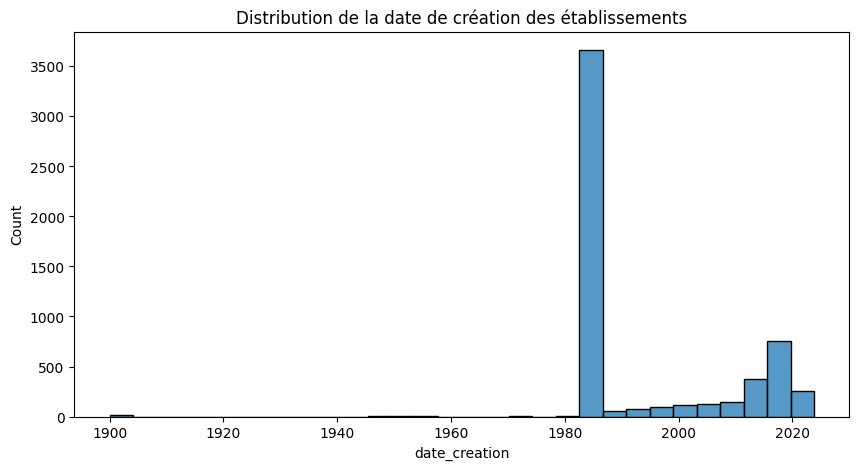

In [15]:
# Visualisation de la distribution de date_creation
plt.figure(figsize=(10,5))
sns.histplot(pd.to_datetime(df["date_creation"], errors="coerce").dropna(), bins=30, kde=False)
plt.title("Distribution de la date de création des établissements")

In [16]:
# Binning pour date_creation
df["date_creation"] = pd.to_datetime(df["date_creation"], errors="coerce")
df["annee_creation"] = df["date_creation"].dt.year

df["annee_creation_bin"] = pd.cut(
    df["annee_creation"],
    bins=[1900, 1980, 1990, 2000, 2010, 2020, 2030],
    labels=["<1980", "80-89", "90-99", "00-09", "10-19", "20+"]
)

### A partir des variables textuelles

In [17]:
# Exploitation des variables textuelles : nom_du_projet et resume_du_projet
def clean_text(s):
    s = s.lower()
    s = re.sub(r"[^\w\s]", " ", s)
    s = re.sub(r"\s+", " ", s)
    return s.strip()

df["resume_clean"] = df["resume_du_projet"].apply(clean_text)
df["nom_clean"] = df["nom_du_projet"].apply(clean_text)

# Définition de mots-clés métiers
keywords = [
    "renovation",
    "energetique",
    "batiment",
    "ecole",
    "eclairage",
    "incendie",
    "mobilite",
    "isolation",
    "chauffage",
    "photovolta",
    "recyclage"
]

# Création de variables binaires
for kw in keywords:
    df[f"kw_{kw}"] = (
        df["resume_clean"].str.contains(kw) |
        df["nom_clean"].str.contains(kw)
    ).astype(int)
# La variable vaut 1 si le mot clé apparaît au moins une fois dans le nom ou dans le résumé du projet

# Suppression des colonnes inutiles après traitement
# Colonnes pas directement exploitables
cols_to_remove = [
    "nom_du_projet",
    "resume_du_projet", 
    "nom_clean", 
    "resume_clean", 
]
df = df.drop(columns=cols_to_remove)

In [18]:
# Exploitation de la variable textuelle : raison_sociale_beneficiaire
def clean_text(s):
    s = s.lower()
    s = re.sub(r"[^\w\s]", " ", s)
    s = re.sub(r"\s+", " ", s)
    return s.strip()

# Nettoyage du texte
df["raison_sociale_clean"] = df["raison_sociale_beneficiaire"].apply(clean_text)

# Définition de mots-clés métiers (typologie des bénéficiaires)
keywords_benef = [
    "commune",
    "ville",
    "departement",
    "region",
    "metropole",
    "communaute",
    "syndicat",
    "association",
    "territoires",
    "public"
]

# Création de variables binaires
for kw in keywords_benef:
    df[f"kw_benef_{kw}"] = (
        df["raison_sociale_clean"].str.contains(kw)
    ).astype(int)

# La variable vaut 1 si le mot-clé apparaît dans la raison sociale du bénéficiaire

# Suppression des colonnes inutiles après traitement
cols_to_remove = [
    "raison_sociale_beneficiaire",
    "raison_sociale_clean"
]

df = df.drop(columns=cols_to_remove)

# Vérification finale
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5679 entries, 0 to 7093
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   montant_engage                           5679 non-null   float64       
 1   demarche                                 5679 non-null   category      
 2   nom_region                               5679 non-null   category      
 3   nom_departement                          5679 non-null   category      
 4   code_departement                         5679 non-null   category      
 5   forme_juridique_beneficiaire             5679 non-null   category      
 6   code_commune                             5679 non-null   category      
 7   nom_commune                              5679 non-null   category      
 8   siret                                    5679 non-null   category      
 9   activite_principale                      5679 

# Statistiques descriptives
## Statistiques descriptives univariées
### Variables numériques

In [19]:
# Statistiques descriptives pour les variables numériques continues 
for col in df.select_dtypes('float64').columns:
    display(df[col].describe())

count    5.679000e+03
mean     1.759721e+05
std      3.290579e+05
min      2.875000e+02
25%      1.634060e+04
50%      6.000000e+04
75%      2.000000e+05
max      6.823074e+06
Name: montant_engage, dtype: float64

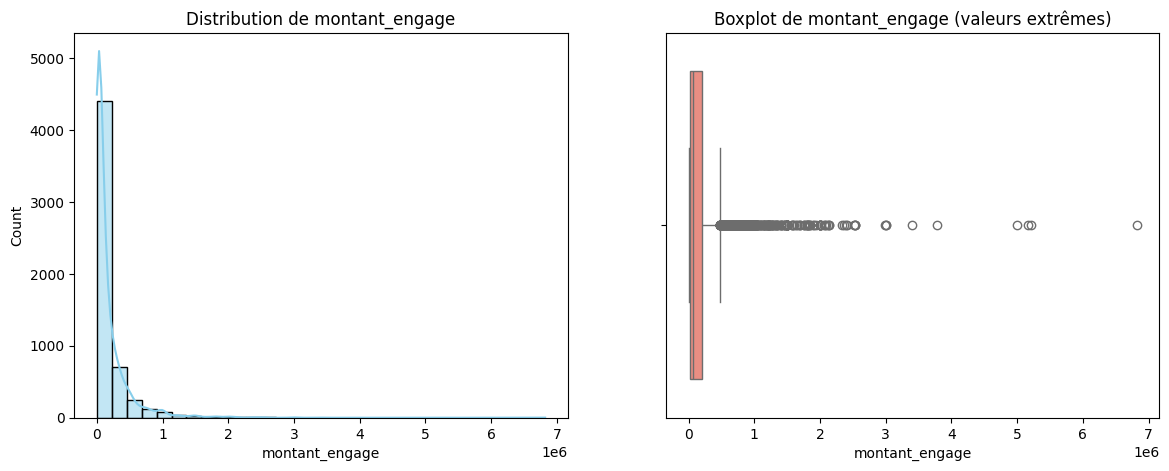

In [20]:
# Distribution et valeurs extrêmes
# Histogramme + Boxplot 
for col in df.select_dtypes('float64').columns:
    fig, axes = plt.subplots(1,2, figsize=(14,5))
    
    # Histogramme
    sns.histplot(df[col], bins=30, kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f"Distribution de {col}")
    
    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1], color="salmon")
    axes[1].set_title(f"Boxplot de {col} (valeurs extrêmes)")
    
    plt.show()

# Distribution fortement asymétrique
# Beaucoup de valeurs potentiellement extrêmes dans montant_engage, pouvant influencer les modèles

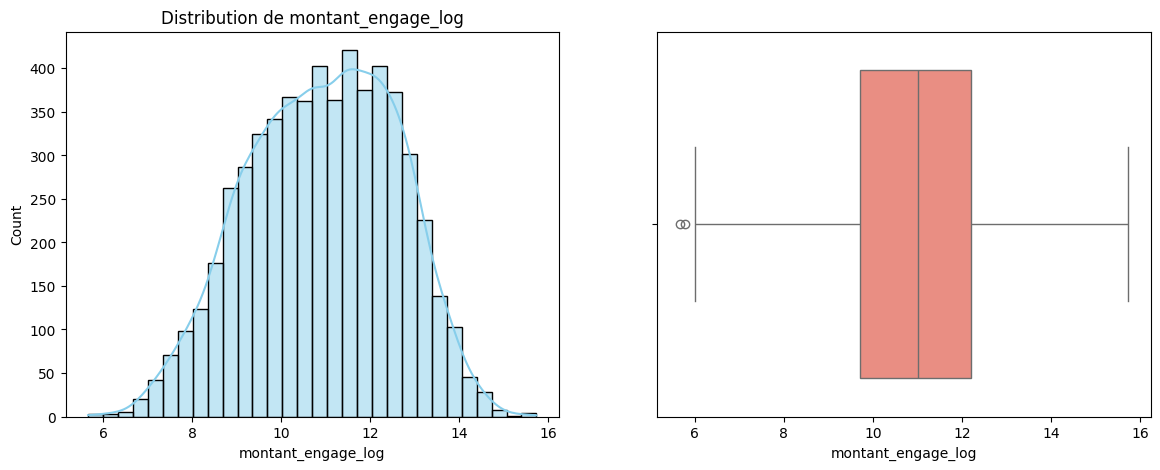

In [21]:
# Transformation logarithmique pour montant_engage
df["montant_engage_log"] = np.log1p(df["montant_engage"])

# Suppression de l'ancienne variable
df = df.drop(columns=["montant_engage"])

# Visualisation après transformation
for col in ["montant_engage_log"]:
    fig, axes = plt.subplots(1,2, figsize=(14,5))
    
    # Histogramme
    sns.histplot(df[col], bins=30, kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f"Distribution de {col}")
    
    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1], color="salmon")

# La distribution paraît plus normale et il y a désormais uniquement 2 potentielles valeurs atypiques

Shape après suppression des valeurs extrêmes : (5567, 39)


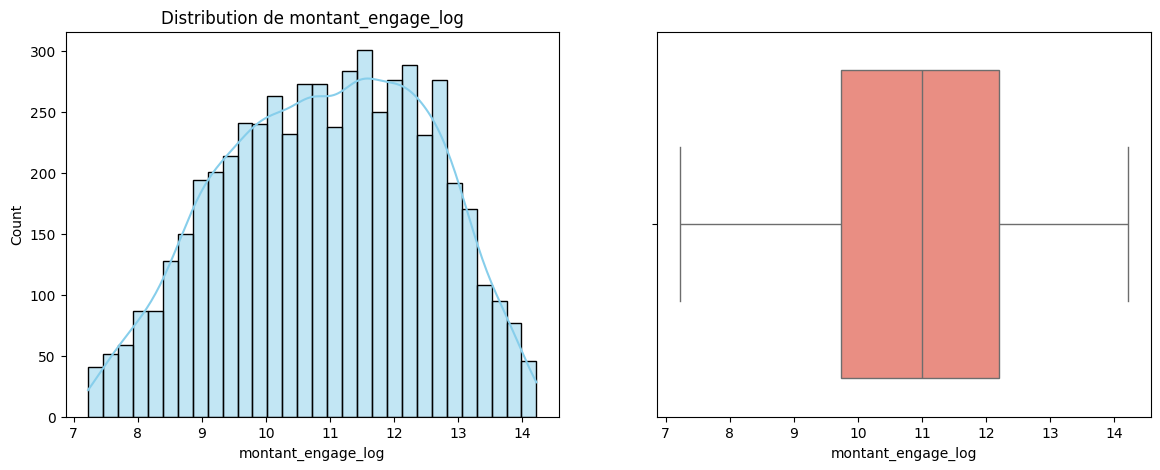

In [22]:
# Traitement des valeurs extrêmes dans montant_engage
# Suppression des 1% valeurs les plus élevées et les 1% les plus basses
lower_bound = df["montant_engage_log"].quantile(0.01)
upper_bound = df["montant_engage_log"].quantile(0.99)
df = df[(df["montant_engage_log"] >= lower_bound) & (df["montant_engage_log"] <= upper_bound)]
print(f"Shape après suppression des valeurs extrêmes : {df.shape}")

# Distribution et valeurs extrêmes après traitement
for col in ["montant_engage_log"]:
    fig, axes = plt.subplots(1,2, figsize=(14,5))
    
    # Histogramme
    sns.histplot(df[col], bins=30, kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f"Distribution de {col}")
    
    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1], color="salmon")

# On passe de 5679 à 5567 lignes après suppression des valeurs extrêmes
# 112 lignes supprimées

### Variables catégorielles

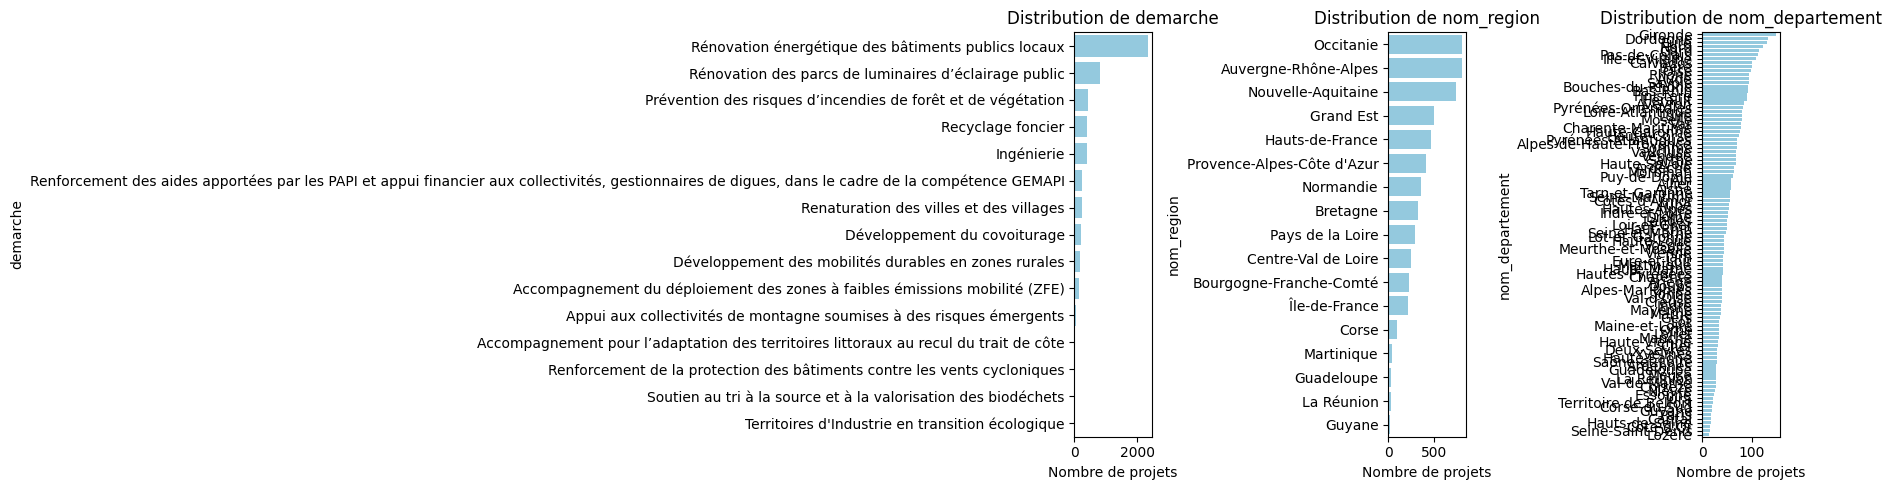

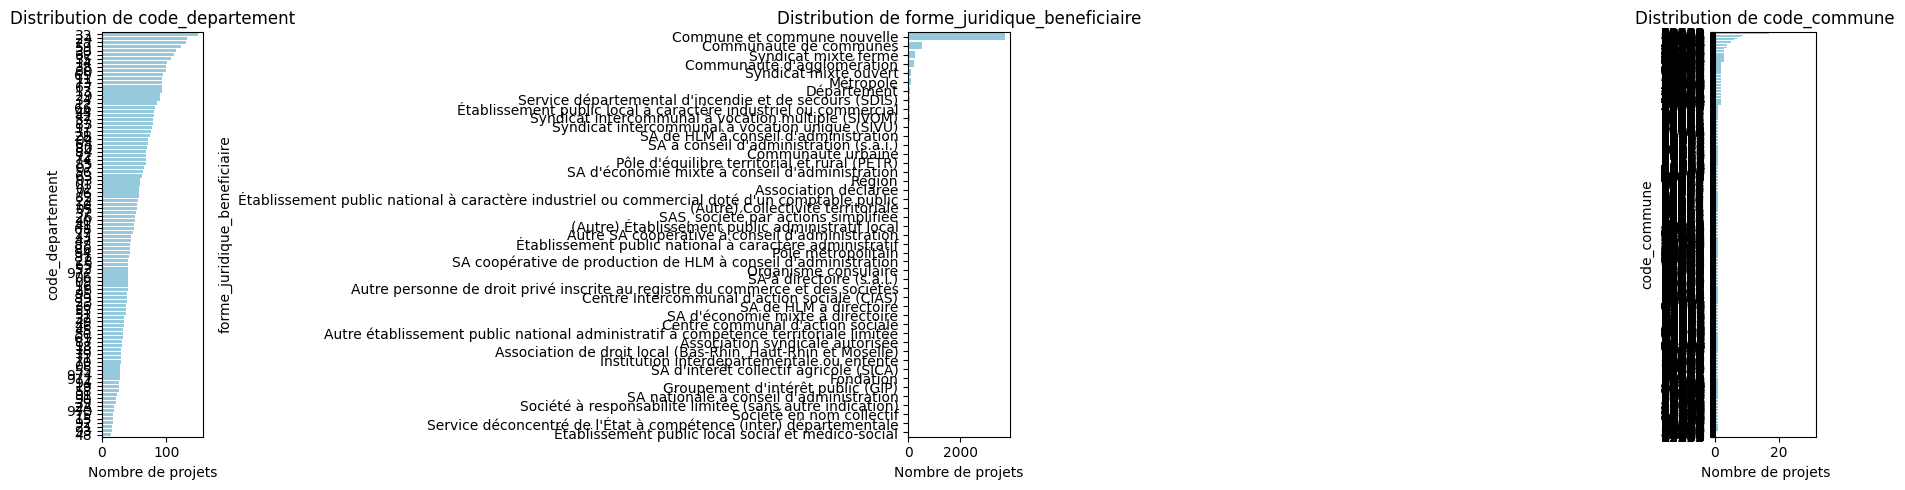

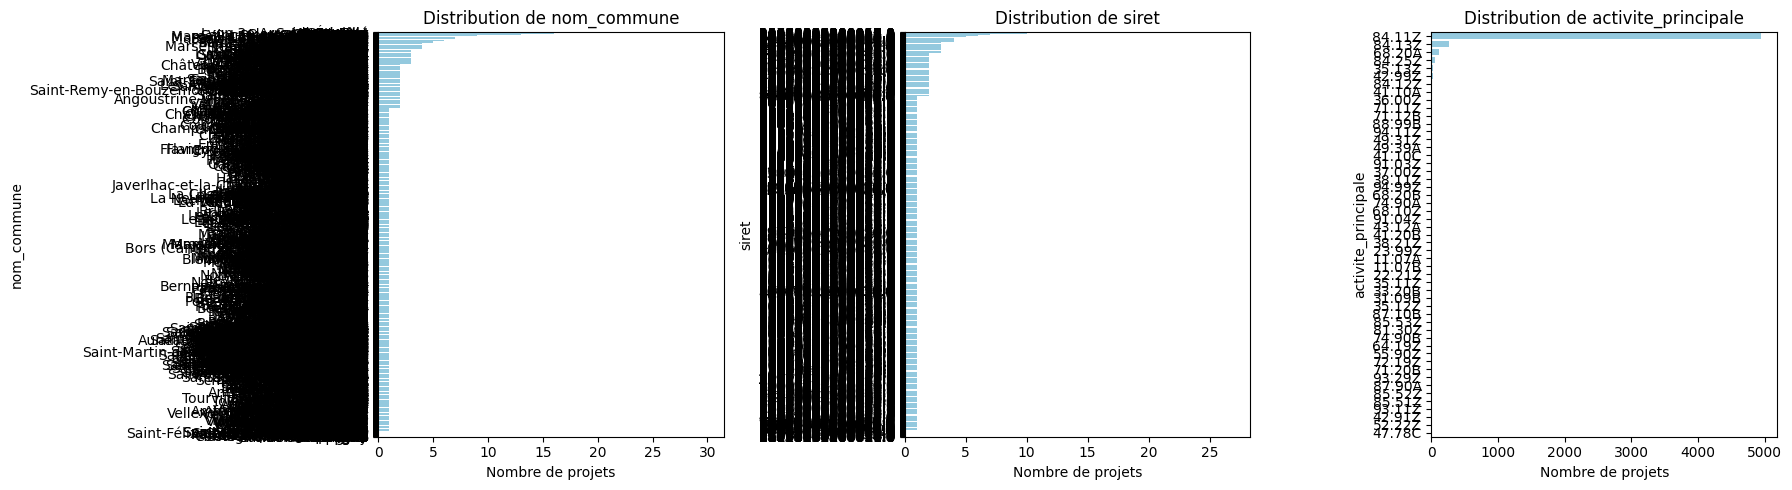

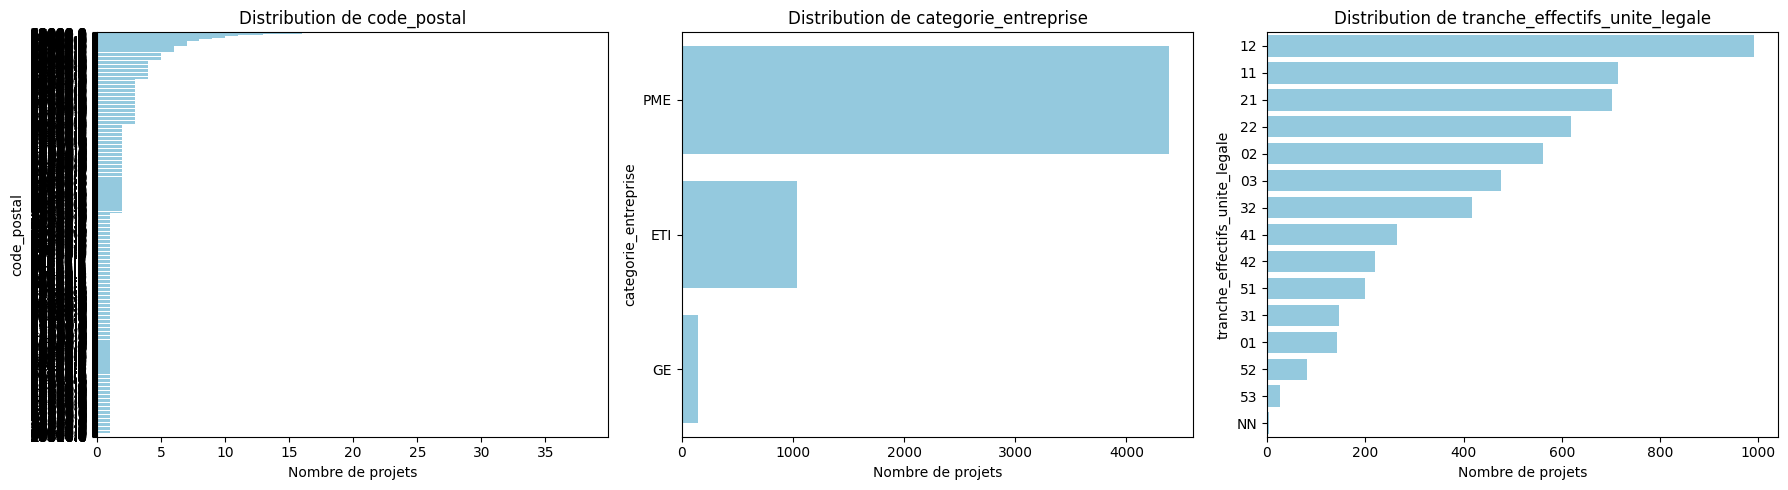

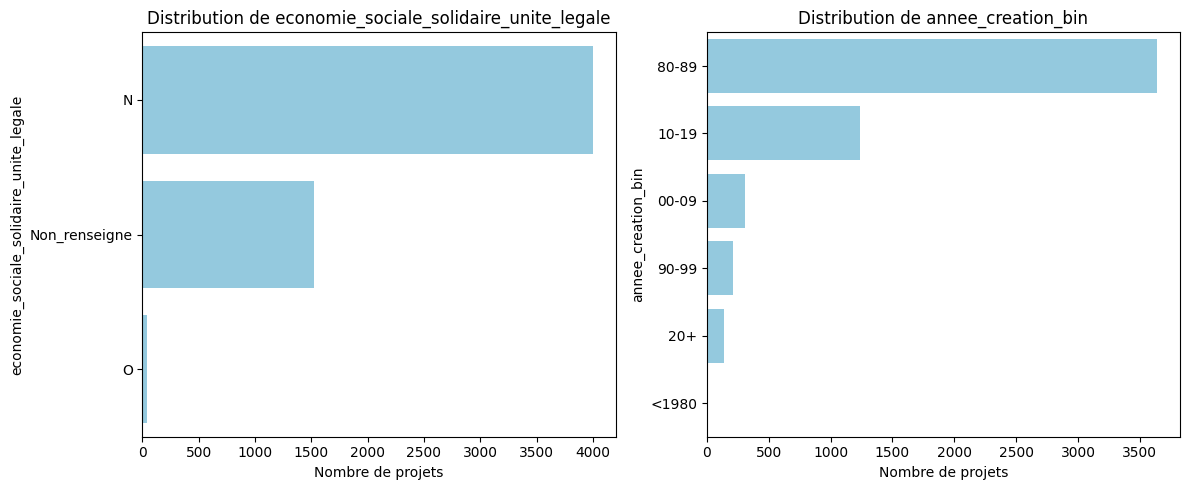

In [ ]:
# Distribution des variables catégorielles (subplots)
# category avec + de 30 modalités
# nom_departement, code_departement, forme_juridique_beneficiaire, code_commune, nom_commune, siret, code_postal, activite_principale

# category avec - de 30 modalités
# demarche, nom_region, categorie_entreprise, tranche_effectif_unite_legale, economie_sociale_solidaire_unite_legale, nb_projet_siret, annee_creation_bin

cat_cols = df.select_dtypes('category').columns.tolist()
n_cols = 3  # nombre de graphiques par ligne

for i in range(0, len(cat_cols), n_cols):
    cols_slice = cat_cols[i:i+n_cols]
    fig, axes = plt.subplots(1, len(cols_slice), figsize=(6*len(cols_slice), 5))
    
    # Si une seule colonne dans la ligne, axes n'est pas un array
    if len(cols_slice) == 1:
        axes = [axes]
    
    for ax, col in zip(axes, cols_slice):
        sns.countplot(
            y=col,
            data=df,
            order=df[col].value_counts().index,
            color="skyblue",
            ax=ax
        )
        ax.set_title(f"Distribution de {col}", fontsize=12)
        ax.set_xlabel("Nombre de projets")
        ax.set_ylabel(col)
    
    plt.tight_layout()
    plt.show()


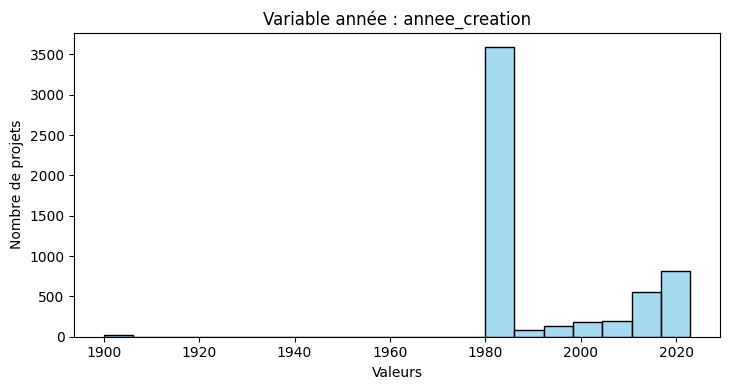

In [ ]:
# Variables "années" 
year_cols = [c for c in df.select_dtypes('int32').columns]

# Fonction pour créer les plots en grid
def plot_int_vars(columns, title_prefix):
    n_cols = 2
    n_rows = (len(columns) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows*4))
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        sns.histplot(df[col], kde=False, bins=20, color="skyblue", ax=axes[i])
        axes[i].set_title(f"{title_prefix} : {col}")
        axes[i].set_xlabel("Valeurs")
        axes[i].set_ylabel("Nombre de projets")
    
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

if year_cols:
    plot_int_vars(year_cols, "Variable année")

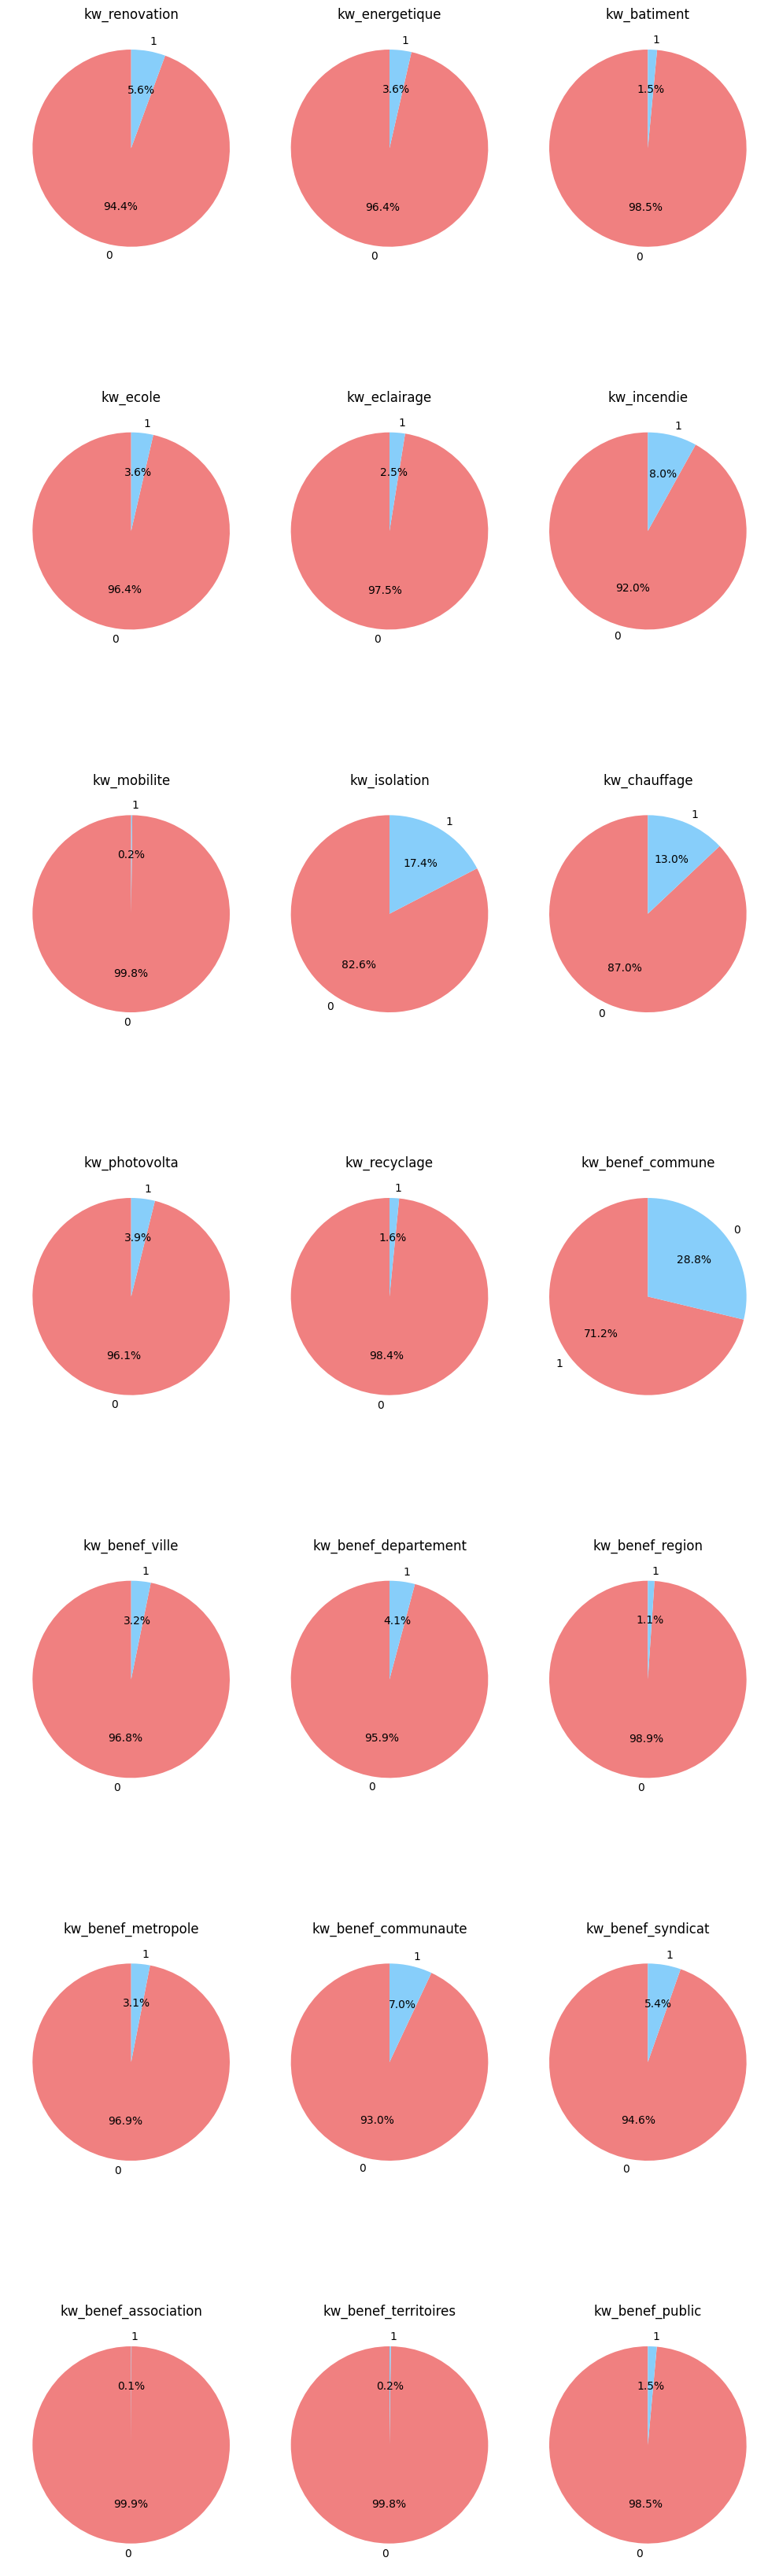

In [28]:
# Variables binaires : int64 avec 2 valeurs possibles
bin_cols = [c for c in df.select_dtypes('int64').columns if df[c].nunique() == 2]

# Fonction pour créer des pie charts pour les variables binaires
def plot_binary_pie(columns):
    n_cols = 3  # nombre de colonnes de graphiques
    n_rows = (len(columns) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows*5))
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        counts = df[col].value_counts()
        axes[i].pie(
            counts, 
            labels=counts.index, 
            autopct='%1.1f%%', 
            startangle=90, 
            colors=['lightcoral','lightskyblue']
        )
        axes[i].set_title(f"{col}")
    
    # Supprimer les axes vides
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Affichage des pie charts pour toutes les variables binaires
if bin_cols:
    plot_binary_pie(bin_cols)

# kw_benef_commune est la seule variable binaire qui a majoritairement des 1 (71,2%)


## Statistiques descriptives bivariées
### Corrélation entre variables explicatives

### Corrélation entre variables explicatives et la variable cible

In [ ]:
# Boxplots par catégorie
for col in df.select_dtypes('category').columns:
    plt.figure(figsize=(12,5))
    sns.boxplot(x=col, y="montant_engage", data=df, palette="pastel")
    plt.yscale("log")  # si variable cible fortement skewée
    plt.title(f"Montant engagé par {col}")
    plt.xticks(rotation=45)
    plt.show()

# Encodage des variables catégorielles

# Modélisation